## SciKit-Learn for Supervised Larning

### Classification with Regression

In [99]:
import pandas as pd

#### Example 1: Diabletes data

Importing the data from Diabetes where 1 represents a diagnosis and 0 absence of diagnosis

In [100]:
diabetes_df = pd.read_csv("data/diabetes_clean.csv")

print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


Create feature and target arrays

In [101]:
X = diabetes_df.drop("glucose",axis=1).values
y = diabetes_df["glucose"].values

In [102]:
# Let's make predictions from the bmi and age columns
X_bmi = X[:,4]
X_age = X[:,6]
print(X_bmi.shape, X_age.shape, y.shape)

(768,) (768,) (768,)


In [103]:
# We need a 2d array for scikit-learn
X_bmi = X_bmi.reshape(-1,1)
X_age = X_age.reshape(-1,1)
print(X_bmi.shape, X_age.shape)

(768, 1) (768, 1)


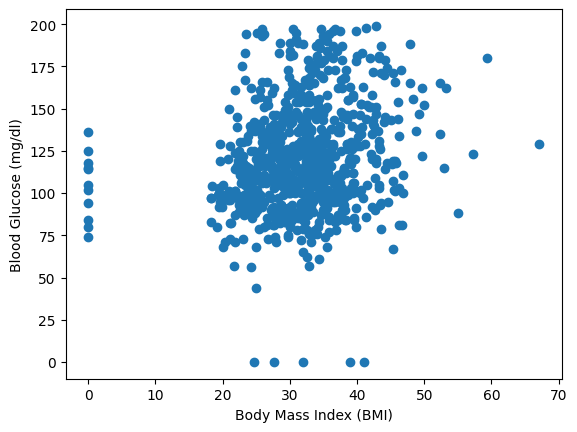

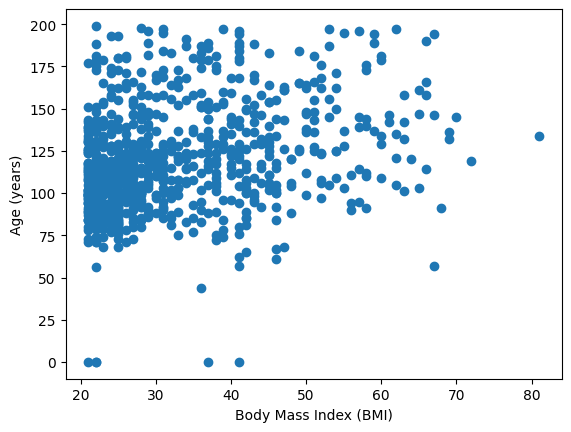

In [104]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi,y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index (BMI)")
plt.show()

plt.scatter(X_age,y)
plt.ylabel("Age (years)")
plt.xlabel("Body Mass Index (BMI)")
plt.show()

In [105]:
# Perform linear regression to the model
from sklearn.linear_model import LinearRegression
lr_bmi = LinearRegression()
lr_bmi.fit(X_bmi,y)
prediction_bmi = lr_bmi.predict(X_bmi)

lr_age = LinearRegression()
lr_age.fit(X_age,y)
prediction_age = lr_age.predict(X_age)

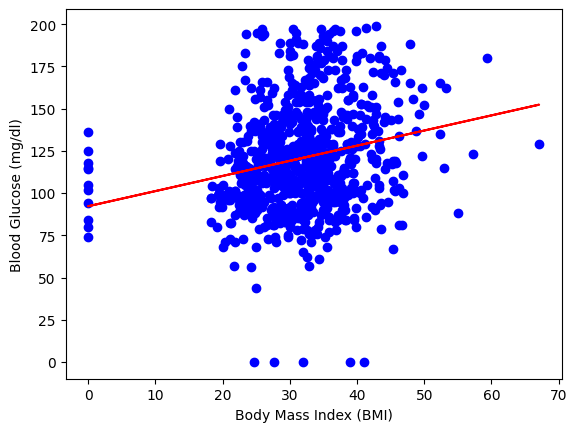

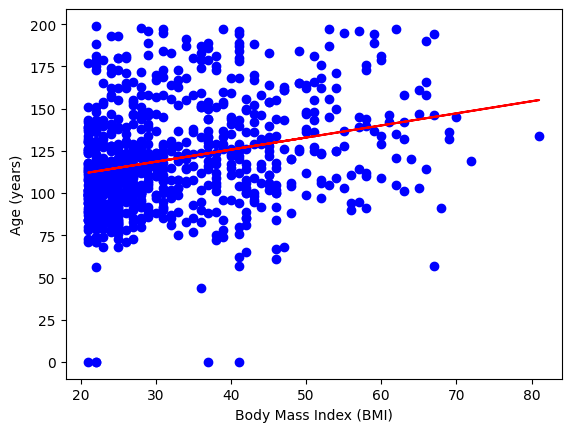

In [106]:
plt.scatter(X_bmi,y,color='b')
plt.plot(X_bmi,prediction_bmi, color='r')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index (BMI)")
plt.show()

plt.scatter(X_age,y,color='b')
plt.plot(X_age,prediction_age, color='r')
plt.ylabel("Age (years)")
plt.xlabel("Body Mass Index (BMI)")
plt.show()

##### Let's do linear regression with all the features (Multiple linear regression)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
# We split our data to see the accuracy of our fit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [109]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_pred = lr_all.predict(X_test)

In [110]:
# R-squared
lr_all.score(X_test,y_test)

0.28280468810375115

In [111]:
# Mean squared error (MSE) and root means squared error (RMSE)
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

26.341459582232265

#### Example 2: Advertising and Sales data

In [112]:
import pandas as pd

In [113]:
sales_df = pd.read_csv("data/advertising_and_sales_clean.csv")

print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [114]:
# Features (radio expenditures) and targets (sales)
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

print(X[0:5],y[0:5])

[ 6566.23  9237.76 15886.45 30020.03  8437.41] [ 54732.76  46677.9  150177.83 298246.34  56594.18]


In [115]:
X = X.reshape(-1,1)
print(X.shape, y.shape)

(4546, 1) (4546,)


In [116]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit to data
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
# Predictions
prediction = lr.predict(X)
print(prediction[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


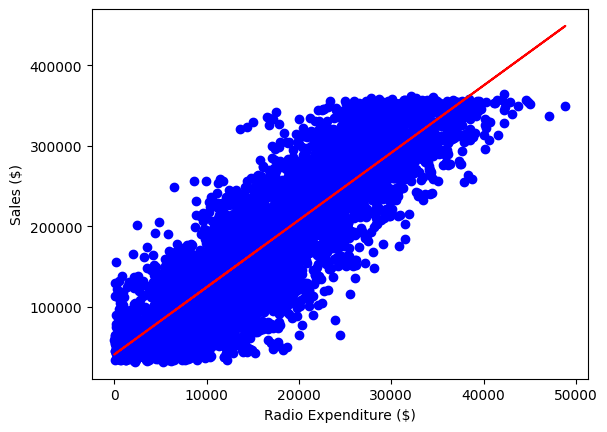

In [118]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, prediction, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

##### Let's do linear regression with all the features (Multiple linear regression)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
# Create X as all features except "sales"
X = sales_df.drop(["sales","influencer"],axis=1).values

# Create y from the sales column's values
y = sales_df["sales"].values

print(X[0:5], y[0:5])

[[16000.    6566.23  2907.98]
 [13000.    9237.76  2409.57]
 [41000.   15886.45  2913.41]
 [83000.   30020.03  6922.3 ]
 [15000.    8437.41  1406.  ]] [ 54732.76  46677.9  150177.83 298246.34  56594.18]


In [121]:
# We split our data to see the accuracy of our fit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [122]:
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)
y_pred = lr_all.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [123]:
# R-squared
r_squared = lr_all.score(X_test,y_test)

In [124]:
# Mean squared error (MSE) and root means squared error (RMSE)
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)

In [125]:
# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001015
